In [50]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Training

In [2]:
#loading dataset
train = pd.read_csv('https://raw.githubusercontent.com/MiNicoB/Titanic/main/train.csv')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
#separating dependand variable from df
X_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']

In [16]:
#defining numerical and categorical idep vars
num_vars = ['Age','Fare','SibSp','Parch']
cat_vars = ['Pclass','Sex','Embarked']

In [24]:
# Defining the preprocessing steps for numerical and categorical variables
# imputing missing values, scaling, encoding
num_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=20, random_state=0)),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [25]:
# Combine the numerical and categorical transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_vars),
    ('cat', cat_transformer, cat_vars)
])

In [26]:
# Combine the preprocessing steps and the classifier into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

In [28]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(max_iter=20,
                                                                                    random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])]))])

In [31]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
pd.DataFrame(X_train_preprocessed, columns = feature_names)

,num__Age,num__Fare,num__SibSp,num__Parch,cat__Pclass_1,cat__Pclass_2,cat__Pclass_3,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,-0.569624,-0.502445,0.432793,-0.473674,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.623308,0.786845,0.432793,-0.473674,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.271391,-0.488854,-0.474545,-0.473674,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.399633,0.420730,0.432793,-0.473674,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.399633,-0.486337,-0.474545,-0.473674,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.196833,-0.386671,-0.474545,-0.473674,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,-0.793298,-0.044381,-0.474545,-0.473674,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,-0.407732,-0.176263,0.432793,2.008933,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
889,-0.271391,-0.044381,-0.474545,-0.473674,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
# Combine the preprocessing steps and the classifier into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

In [34]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(max_iter=20,
                                                                                    random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier', DecisionTreeClassifier())])

In [73]:
# Define the hyperparameter space for grid search
param_grid = {
    'classifier__criterion': ['gini', 'entropy']
    ,'classifier__max_depth': [3,4,5] #with the decision tree class it has tendency to overfiting
    ,'classifier__min_samples_split': [5,10,15,20,25,30]
    ,'classifier__min_samples_leaf': [5,10,15,20,25,30]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 25}
Best score:  0.821542903772519


In [74]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(max_iter=20,
                                                                                    random_state=0)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=5,
                                        min_samples_split=25))])

In [75]:
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       549
           1       0.82      0.74      0.78       342

    accuracy                           0.84       891
   macro avg       0.83      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891



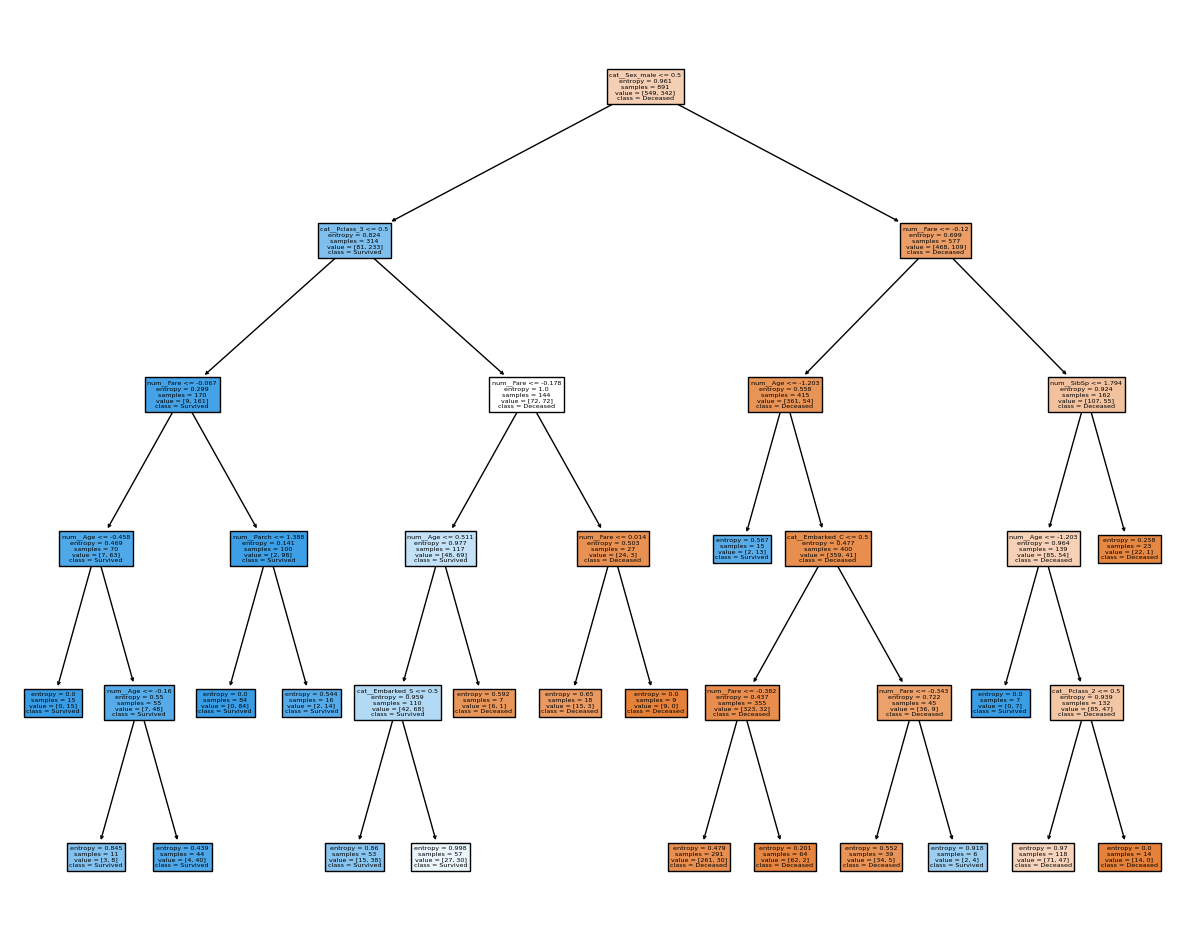

In [76]:
tree_model = best_estimator.get_params()['classifier']
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

plt.subplots(figsize = (15,12))
plot_tree(tree_model,
          feature_names = feature_names,
          class_names = ['Deceased', 'Survived'],
          filled = True)
plt.show()

# Test

In [77]:
test = pd.read_csv('https://raw.githubusercontent.com/MiNicoB/Titanic/main/test.csv')

test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [78]:
test_pred = best_estimator.predict(test)
test_pred = pd.DataFrame(test_pred,columns=['Survived'])
test_pred

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [79]:
pd.concat([test['PassengerId'],test_pred],axis=1).to_csv('result_pipe.csv',index=False)

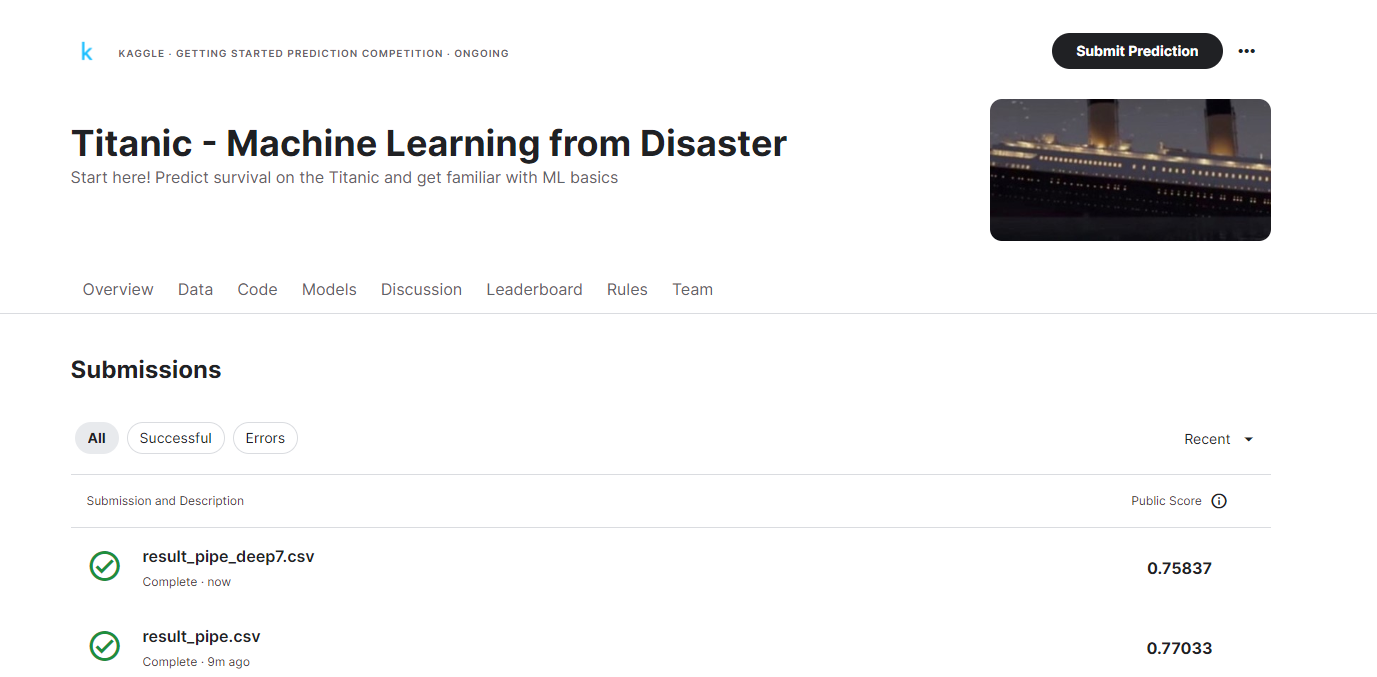